# Importing Libraries

# **DO NOT CHANGE CODE**

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df1 = pd.read_csv(r"C:\Users\vinayak\minor_proj\collabRV\collabRV\Z_Current\Neural network\Sets\random_imputed_2.csv",index_col=[0])
df1.sample(5)

,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,...,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,carboxyhemoglobin,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,total.hemoglobin
inpatient.number,,,,,,,,,,,,,,,,,,,,,
843701,36.0,110,21,151,99,116.333333,17.968750,2,4,2,...,4.222041,4.054728,105.266392,137.504951,4.004407,0.984126,94.761200,95.966211,96.383500,157.714739
753613,36.8,87,18,140,88,105.333333,25.654372,2,2,3,...,3.900000,2.870000,106.000000,136.800000,5.300000,0.200000,96.000000,88.000000,95.800000,128.000000
799188,38.5,87,19,105,80,88.333333,23.733238,2,2,2,...,1.332240,4.019173,100.871968,145.733456,4.915273,0.209970,96.162297,86.115728,96.425591,155.928851
806741,36.0,79,21,150,100,116.666667,17.578125,2,4,2,...,25.600000,2.890000,104.000000,133.900000,4.900000,0.700000,74.000000,41.000000,73.700000,128.000000
744819,36.3,120,20,141,79,99.666667,20.028842,2,3,2,...,14.500000,3.570000,100.000000,133.400000,7.700000,0.300000,85.000000,51.000000,84.900000,99.000000


In [11]:
df3=pd.read_csv(r"C:\Users\vinayak\minor_proj\collabRV\collabRV\Z_Current\Neural network\Sets\drug_onehot_latest.csv",index_col=[0])
df3.head()


,Atorvastatin calcium tablet,Benazepril hydrochloride tablet,Deslanoside injection,Digoxin tablet,Dobutamine hydrochloride injection,Furosemide injection,Furosemide tablet,Hydrochlorothiazide tablet,Isoprenaline Hydrochloride injection,Isosorbide Mononitrate Sustained Release tablet,Meglumine Adenosine Cyclophosphate for injection,Milrinone injection,Nitroglycerin injection,Shenfu injection,Spironolactone tablet,Torasemide tablet,Valsartan Dispersible tablet,sulfotanshinone sodium injection
inpatient.number,,,,,,,,,,,,,,,,,,
722128,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
723327,1,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0
723617,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
724385,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
725509,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,0


In [12]:
r="Dobutamine hydrochloride injection"


In [13]:
#df1.drop(['hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase','hydroxybutyrate.dehydrogenase','free.calcium','anion.gap','lactate.dehydrogenase','lactate','CCI.score','consciousness','eye.opening','verbal.response','respiratory.support.','gender','ageCat'],axis=1,inplace=True)

# Principle Component Analysis

#  Dobutamine

In [14]:
df2=df3[r]
df=pd.concat([df1,df2],axis=1)
cols_to_scale = [df.columns]
scaler = MinMaxScaler()
scaled_df= scaler.fit_transform(df)
df = pd.DataFrame(scaled_df,columns = df.columns)

In [15]:
X = df.drop(r,axis='columns')
y = df[r]


In [16]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca)
PCA_df = pd.concat([PCA_df, df[r]], axis = 1)
PCA_df.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,Dobutamine hydrochloride injection
0,0.485152,-0.268583,-0.507123,0.513626,-0.233606,0.030368,0.058925,-0.343838,0.243563,0.286981,...,0.081991,0.090898,-0.017447,0.121411,-0.015282,0.080368,-0.118612,-0.045980,-0.011813,0.0
1,-0.145042,-0.353461,-0.183404,-0.139457,-0.245284,-0.129782,0.252421,-0.349743,0.220273,0.805366,...,-0.099277,0.057628,0.085873,-0.022387,-0.130570,0.083693,0.089900,0.141666,0.119717,0.0
2,-0.173621,-0.210423,-0.200054,-0.314970,0.105571,-0.199907,-0.110117,0.278727,-0.162158,0.274271,...,-0.130396,-0.007525,0.038919,-0.133981,0.069500,0.077070,0.069247,-0.060637,-0.157007,0.0
3,0.396161,-0.094074,-0.584406,0.188463,0.424859,0.632022,-0.447740,-0.320468,0.039108,-0.089374,...,-0.076964,0.109443,-0.010140,0.230267,0.041187,-0.201982,0.065821,-0.019499,-0.062648,0.0
4,-0.427098,-0.211032,0.043938,0.211464,-0.214811,-0.171968,-0.411327,-0.091980,0.044690,-0.117016,...,0.027913,-0.207839,0.081620,0.099522,-0.040893,0.002526,0.224720,0.039183,-0.006331,0.0


In [17]:
count_class_0, count_class_1 = PCA_df[r].value_counts()[0], PCA_df[r].value_counts()[1]
# Divide by class
df_class_0 = PCA_df[PCA_df[r] == 0]
df_class_1 = PCA_df[PCA_df[r] == 1]

In [18]:
PCA_df[r].value_counts(ascending =True)

1.0      22
0.0    1981
Name: Dobutamine hydrochloride injection, dtype: int64

In [19]:
# Oversample 1-class and concat the DataFrames of both classes( if count of 0 greater than count of 1)
# Oversample 0-class and concat the DataFrames of both classes( if count of 0 lesser than count of 1)
if count_class_0>count_class_1:
    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

    print('Random over-sampling:')
    print(df_test_over[r].value_counts())
else:
    df_class_0_over = df_class_0.sample(count_class_1,replace=True)
    df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

    print('Random over-sampling:')
    print(df_test_over[r].value_counts())

Random over-sampling:
0.0    1981
1.0    1981
Name: Dobutamine hydrochloride injection, dtype: int64


In [20]:
X = df_test_over.drop(r,axis='columns')
y = df_test_over[r]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [21]:
y_train.value_counts()

1.0    1585
0.0    1584
Name: Dobutamine hydrochloride injection, dtype: int64

In [22]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from yellowbrick.model_selection import learning_curve

# cancer = load_breast_cancer()
svm = SVC(C=0.05, kernel='linear', gamma='scale',probability=True)
#print(learning_curve(svm, X, y, cv=10, scoring='accuracy'))


In [23]:
svm.fit(X_train,y_train)

SVC(C=0.05, kernel='linear', probability=True)

In [24]:
svm.score(X_train,y_train)

0.8914484064373619

In [25]:
svm.score(X_test,y_test)

0.8902900378310215

In [26]:
# >>> from sklearn.ensemble import RandomForestClassifier
# >>> from sklearn.datasets import make_classification


In [27]:
# >>> clf = RandomForestClassifier(n_estimators=100,max_depth=2, random_state=0)
# >>> clf.fit(X_train, y_train)


In [28]:
# clf.score(X_train,y_train)

In [29]:
# clf.score(X_test,y_test)

In [30]:
y_preds = svm.predict(X_test)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.83      0.88       397
         1.0       0.85      0.95      0.90       396

    accuracy                           0.89       793
   macro avg       0.90      0.89      0.89       793
weighted avg       0.90      0.89      0.89       793



In [31]:
# get the probability distribution
probas = svm.predict_proba(X_test)
# # plot
# plt.figure(dpi=150)
# plt.hist(probas, bins=20)
# plt.title('Classification Probabilities')
# plt.xlabel('Probability')
# plt.ylabel('# of Instances')
# plt.xlim([0.5, 1.0])
# # plt.legend(target_names)
# plt.show()

# This is the ROC curve for SVM for Dobumtamine

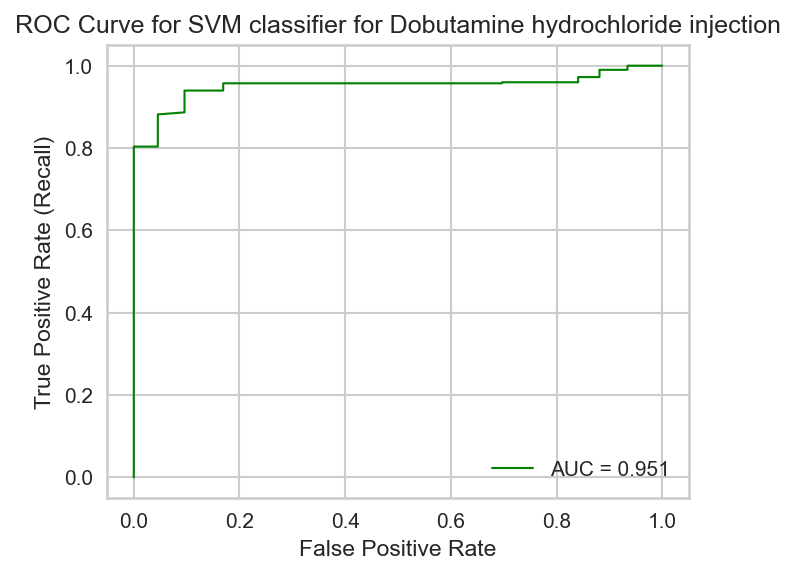

In [35]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(figsize=(5,4),dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for SVM classifier for Dobutamine hydrochloride injection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


In [36]:
import seaborn as sns

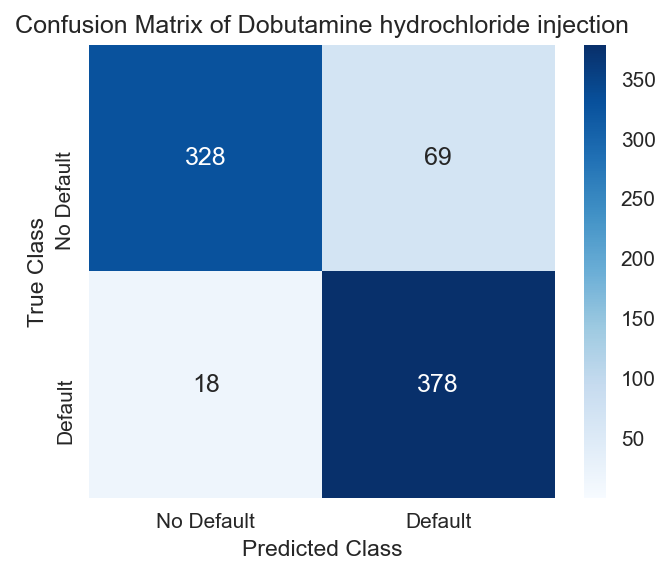

In [37]:
cm = confusion_matrix(y_test, y_preds)
labels = ['No Default', 'Default']
plt.figure(figsize=(5,4),dpi=150)
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix of Dobutamine hydrochloride injection')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()